Sources:

- https://www.tensorflow.org/tutorials/keras/text_classification_with_hub

- https://www.youtube.com/playlist?list=PLzMcBGfZo4-lak7tiFDec5_ZMItiIIfmj

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [2]:
data = keras.datasets.imdb

In [3]:
# This dataset does not work with the current version of numpy, so use the method below to revert to old version
# source: https://trainingsupport.microsoft.com/en-us/tcmpd/forum/all/lab-7-gives-error-typeerror-lambda-got-multiple/38042cb6-a705-4097-a5a7-06771fa02641

old = np.load
np.load = lambda *a,**k: old(*a,allow_pickle=True)

In [4]:
(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=10000)

In [5]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


- an integer is created above representing each word.

In [7]:
# This gives us tuples, of the associated words and integers, shown below:

word_index = data.get_word_index()

1646592/1641221 [==============================] - 1s 0us/step


In [12]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [15]:
# Breaking the tuple up into key (k) and value(v):

word_index = {k: (v+3) for k, v in word_index.items()} # +3 bc adding new values below
word_index["<PAD>"] = 0  # need this to make each movie review the same length
word_index["<START"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

In [18]:
# swapping the integers and words around, so the integers are on the left to compare with our df which is all integers:

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [26]:
# Adding padding to the end of each review so all reviews are the same length:

train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding="post", maxlen=250)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding="post", maxlen=250)

In [20]:
def decode_review(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [21]:
print(decode_review(train_data[0]))

<START in with i like horrible business chinese charm would killer waited which explosion ? going at fun ? film make like lame character has novel <UNK> a all final sense ? real ? find character nothing <UNK> second perhaps they ? find valuable cover this city an br overall ? horror has i ? should shop was in with ? delightful 00 despite ? with their people is i like horrible an well it br garbage ? with this genre this is i taken that <UNK> ? she sex is and house and after ? ? product bud i final which returned be ? does is i an annoying ? film where if at man it's film sent be ? with is comedy you than some ? in perfect i get <UNK> and ? think plot windows it fun ? <UNK> the lou ? sequence at their like horrible wanted on getting night just the ? <UNK> rich br any other ? couple it someone then he decade more on why ? can't ajay that ? family with for still wanted on final ? such his lindsay that if at you interesting how film any ? family would i an g other is i once ? i boot seen c

# Model:

In [43]:
model = keras.Sequential()

# An embedding layer tries to group similar words together using vectors (see diagram below)
# we have chosen 16 dimensions for each word vector, and 10,000 vectors, one for each word
model.add(keras.layers.Embedding(10000, 16))

# Now scaling down the dimensions to make it easier to compute
model.add(keras.layers.GlobalAveragePooling1D())

# 16 neurons chosen for the input layer:
model.add(keras.layers.Dense(16, activation="relu"))

# model output - good or bad review. Sigmoid function will force values to be 0 or 1.
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Setting up Validation and Training Sets
x_val = train_data[:10000]
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

# batchsize below controls how many reviews to feed the model each cycle:
fitModel = model.fit(x_train, y_train, epochs = 40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

results = model.evaluate(test_data, test_labels)

print(results)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________
Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 27s 2ms/sample - loss: 0.6918 - accuracy: 0.6161 - val_loss: 0.6895 - val_accuracy: 0.6792
Epoch 2/40
15000/15000 [=======================

RESULTS:
    
- Loss of 0.3365
- Accuracy of 0.8698

# Create a graph of accuracy and loss over time

In [55]:
model_dict = fitModel.history
model_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

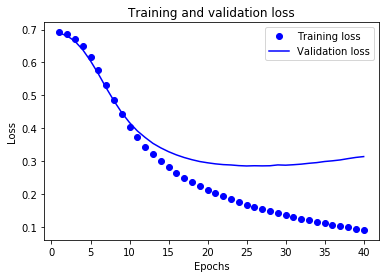

In [56]:
acc = model_dict['accuracy']
val_acc = model_dict['val_accuracy']
loss = model_dict['loss']
val_loss = model_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

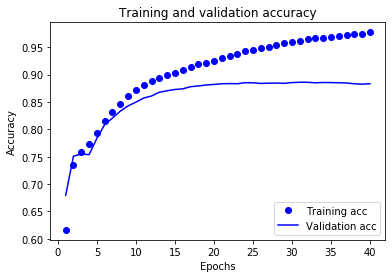

In [57]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [41]:
# Visualizing the embedding process described above:

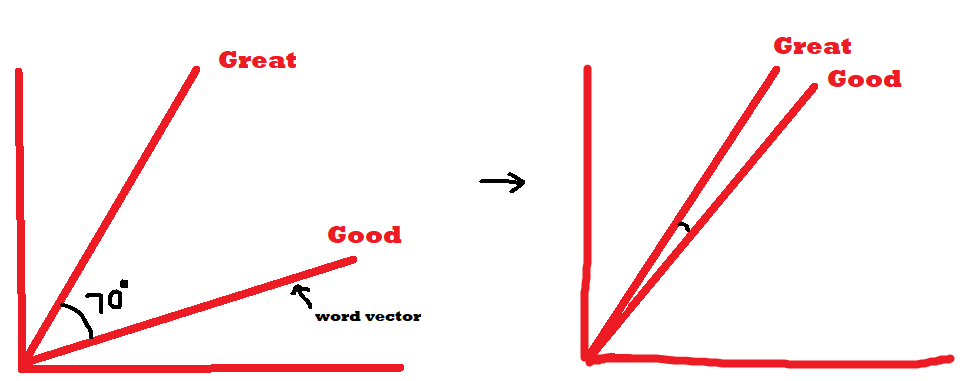

# Evaluation:

In [52]:
test_review = test_data[0]

predict = model.predict([test_review])

print("Review: ")
print(decode_review(test_review))

print("Prediction: " + str(predict[0]))
print("Actual: " + str(test_labels[0]))
print(results)

Review: 
<START murder both in have ? easily of of <UNK> <UNK> ? ? boring the ? again marries understand dead ? over a odd odd odd of of br how where first lead spiral make you cross in have movie not convict are role dark and where in true director and old just ? not last i lot <UNK> an he film spiral based both in ? easily <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <